<a href="https://colab.research.google.com/github/georgezoto/Coding-in-TensorFlow/blob/master/Cassava-Disease-Classification/Cassava_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cassava Disease Classification: Helping farmers identify diseased plants
**Meetup event, come and join us 😀**  
https://www.meetup.com/Deep-Learning-Adventures/events/272014852/

**Kaggle Dataset 🎉**  
https://www.kaggle.com/c/cassava-disease/data

**Acknowledgements**  
We thank the different experts and collaborators from NaCRRI for assisting in preparing this dataset

**Citation**  
Please cite this paper if you use the dataset for your project: https://arxiv.org/pdf/1908.02900.pdf


![alt text](https://secure.meetupstatic.com/photos/event/d/a/6/d/highres_491455917.jpeg)

### Mount Google Drive for images and datasets ##

Using Colab, we need to mount our Google Drive in our virtual machine using an authorization code to access our images and train and test datasets.

- https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Google drive location where your ```kaggle.json``` API key is located

In [4]:
kaggle_google_drive_path = '/content/gdrive/My Drive/Colab Notebooks/Kaggle'

### This enviromental variable is used by ```kaggle competitions download``` command later


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = kaggle_google_drive_path

### Change the working directory where the kaggle api file is

In [6]:
%cd "$kaggle_google_drive_path/Cassava-Disease-Classification"
%ls

/content/gdrive/My Drive/Colab Notebooks/Kaggle/Cassava-Disease-Classification
 Cassava-Disease-Classification-EfficientNetB7-v5.h5  'train-healthy-1 (2).jpg'
 Cassava-Disease-Classification-MobileNetV2-v4.h5      train-healthy-1.jpg
 Cassava-Disease-Classification-v1.h5                 'train-healthy-2 (1).jpg'
 Cassava-Disease-Classification-v2.h5                 'train-healthy-2 (2).jpg'
 Cassava-Disease-Classification-v3.h5                  train-healthy-2.jpg
 extraimages.zip                                      'train-healthy-3 (1).jpg'
 random.txt                                           'train-healthy-3 (2).jpg'
 sample_submission_file.csv                            train-healthy-3.jpg
 test.zip                                             'train-healthy-4 (1).jpg'
'train-healthy-0 (1).jpg'                             'train-healthy-4 (2).jpg'
'train-healthy-0 (2).jpg'                              train-healthy-4.jpg
 train-healthy-0.jpg                                   train.

### Download our kaggle dataset to google drive

In [ ]:
#!kaggle competitions download -c cassava-disease

  0% 0.00/645k [00:00<?, ?B/s]
100% 645k/645k [00:00<00:00, 41.3MB/s]
  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 11.7MB/s]
100% 774M/777M [00:09<00:00, 97.9MB/s]
100% 777M/777M [00:09<00:00, 85.9MB/s]
 98% 504M/515M [00:05<00:00, 99.3MB/s]
100% 515M/515M [00:05<00:00, 101MB/s] 
 99% 1.03G/1.04G [00:19<00:00, 78.4MB/s]
100% 1.04G/1.04G [00:19<00:00, 57.2MB/s]


In [7]:
%ls -ltr

total 3983621
-rw------- 1 root root     660788 Jul 24 01:31  random.txt
-rw------- 1 root root  814615952 Jul 24 01:31  train.zip
-rw------- 1 root root      85797 Jul 24 01:31  sample_submission_file.csv
-rw------- 1 root root  539790463 Jul 24 01:31  test.zip
-rw------- 1 root root 1119165181 Jul 24 01:31  extraimages.zip
-rw------- 1 root root   27855400 Jul 24 01:52  Cassava-Disease-Classification-v1.h5
-rw------- 1 root root      57574 Jul 24 01:52  train-healthy-0.jpg
-rw------- 1 root root      73509 Jul 24 01:52  train-healthy-1.jpg
-rw------- 1 root root      58352 Jul 24 01:52  train-healthy-2.jpg
-rw------- 1 root root      65123 Jul 24 01:52  train-healthy-3.jpg
-rw------- 1 root root      82723 Jul 24 01:52  train-healthy-4.jpg
-rw------- 1 root root  111161392 Jul 24 02:18  Cassava-Disease-Classification-v2.h5
-rw------- 1 root root      57574 Jul 24 02:18 'train-healthy-0 (1).jpg'
-rw------- 1 root root      73509 Jul 24 02:18 'train-healthy-1 (1).jpg'
-rw------- 1 root

In [8]:
%pwd

'/content/gdrive/My Drive/Colab Notebooks/Kaggle/Cassava-Disease-Classification'

In [9]:
import os
import zipfile

local_zip = kaggle_google_drive_path+'/Cassava-Disease-Classification/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = kaggle_google_drive_path+'/Cassava-Disease-Classification/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

### Directories of each class in the training dataset

In [10]:
healthy = os.path.join('/tmp/train/healthy')
cbb = os.path.join('/tmp/train/cbb')
cbsd = os.path.join('/tmp/train/cbsd')
cgm = os.path.join('/tmp/train/cgm')
cmd = os.path.join('/tmp/train/cmd')

print('total training healthy images:', len(os.listdir(healthy)))
print('total training cbb images:', len(os.listdir(cbb)))
print('total training cbsd images:', len(os.listdir(cbsd)))
print('total training cgm images:', len(os.listdir(cgm)))
print('total training cmd images:', len(os.listdir(cmd)))

healthy_files = os.listdir(healthy)
print(healthy_files[:10])

cbb_files = os.listdir(cbb)
print(cbb_files[:10])

cbsd_files = os.listdir(cbsd)
print(cbsd_files[:10])

cgm_files = os.listdir(cgm)
print(cgm_files[:10])

cmd_files = os.listdir(cmd)
print(cmd_files[:10])

total training healthy images: 316
total training cbb images: 466
total training cbsd images: 1443
total training cgm images: 773
total training cmd images: 2658
['train-healthy-20.jpg', 'train-healthy-157.jpg', 'train-healthy-142.jpg', 'train-healthy-119.jpg', 'train-healthy-129.jpg', 'train-healthy-47.jpg', 'train-healthy-283.jpg', 'train-healthy-144.jpg', 'train-healthy-302.jpg', 'train-healthy-94.jpg']
['train-cbb-349.jpg', 'train-cbb-211.jpg', 'train-cbb-252.jpg', 'train-cbb-367.jpg', 'train-cbb-319.jpg', 'train-cbb-39.jpg', 'train-cbb-137.jpg', 'train-cbb-93.jpg', 'train-cbb-180.jpg', 'train-cbb-287.jpg']
['train-cbsd-1339.jpg', 'train-cbsd-865.jpg', 'train-cbsd-907.jpg', 'train-cbsd-300.jpg', 'train-cbsd-595.jpg', 'train-cbsd-493.jpg', 'train-cbsd-1208.jpg', 'train-cbsd-899.jpg', 'train-cbsd-1177.jpg', 'train-cbsd-311.jpg']
['train-cgm-46.jpg', 'train-cgm-97.jpg', 'train-cgm-14.jpg', 'train-cgm-349.jpg', 'train-cgm-181.jpg', 'train-cgm-33.jpg', 'train-cgm-513.jpg', 'train-cgm-55

### Plot 2 images from each class

/tmp/train/healthy/train-healthy-20.jpg


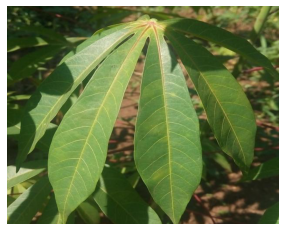

/tmp/train/healthy/train-healthy-157.jpg


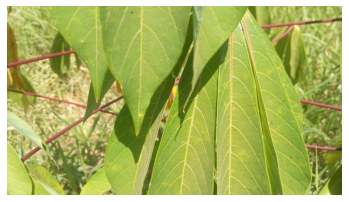

/tmp/train/cbb/train-cbb-349.jpg


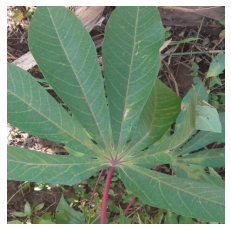

/tmp/train/cbb/train-cbb-211.jpg


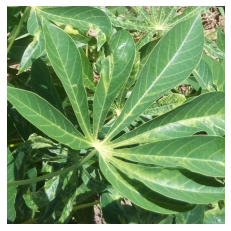

/tmp/train/cbsd/train-cbsd-1339.jpg


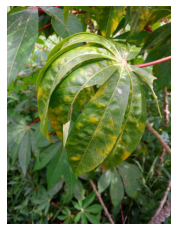

/tmp/train/cbsd/train-cbsd-865.jpg


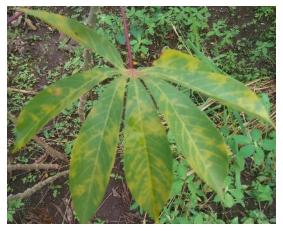

/tmp/train/cgm/train-cgm-46.jpg


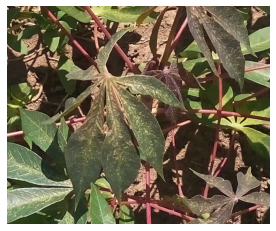

/tmp/train/cgm/train-cgm-97.jpg


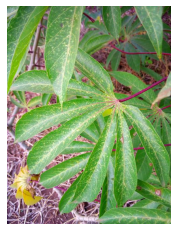

/tmp/train/cmd/train-cmd-469.jpg


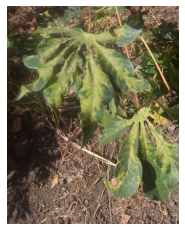

/tmp/train/cmd/train-cmd-2036.jpg


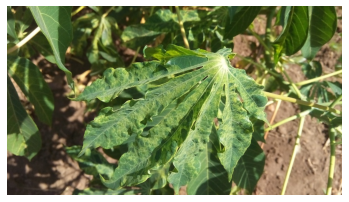

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_healthy = [os.path.join(healthy, fname) 
                for fname in healthy_files[pic_index-2:pic_index]]
next_cbb = [os.path.join(cbb, fname) 
                for fname in cbb_files[pic_index-2:pic_index]]
next_cbsd = [os.path.join(cbsd, fname) 
                for fname in cbsd_files[pic_index-2:pic_index]]
next_cgm = [os.path.join(cgm, fname) 
                for fname in cgm_files[pic_index-2:pic_index]]
next_cmd = [os.path.join(cmd, fname) 
                for fname in cmd_files[pic_index-2:pic_index]]                

for i, img_path in enumerate(next_healthy+next_cbb+next_cbsd+next_cgm+next_cmd):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Import tf, keras_preprocessing, ImageDataGenerator

In [12]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

## Cassava-Disease-Classification-v1 3.4M parameters 58% training accuracy

### Our validation/test data have no labels so we can't really use them to see how our model is performing on this dataset

In [ ]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 5656 images belonging to 5 classes.
Found 3774 images belonging to 1 classes.


### Let's define our deep learning model

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

### Model architecture with tensor shapes as they flow through our network

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

### Let's define our loss function, optimizer and metrics to track

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Model training using GPU

In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 33s 2s/step - loss: 2.3173 - accuracy: 0.3948 - val_loss: 9.9300 - val_accuracy: 0.0000e+00
Epoch 2/25
20/20 [==============================] - 33s 2s/step - loss: 1.3554 - accuracy: 0.4571 - val_loss: 8.8770 - val_accuracy: 0.0000e+00
Epoch 3/25
20/20 [==============================] - 33s 2s/step - loss: 1.3707 - accuracy: 0.4754 - val_loss: 11.0314 - val_accuracy: 0.0000e+00
Epoch 4/25
20/20 [==============================] - 33s 2s/step - loss: 1.3594 - accuracy: 0.4685 - val_loss: 9.1052 - val_accuracy: 0.0000e+00
Epoch 5/25
20/20 [==============================] - 32s 2s/step - loss: 1.3571 - accuracy: 0.4661 - val_loss: 12.3769 - val_accuracy: 0.0000e+00
Epoch 6/25
20/20 [==============================] - 33s 2s/step - loss: 1.3161 - accuracy: 0.4901 - val_loss: 11.6586 - val_accuracy: 0.0026
Epoch 7/25
20/20 [==============================] - 33s 2s/step - loss: 1.3489 - accuracy: 0.5004 - val_loss: 9.4286 - val_accuracy: 0.02

### Save this model and it's weights and biases

In [ ]:
model.save("Cassava-Disease-Classification-v1.h5")

### Plot training accuracy and loss

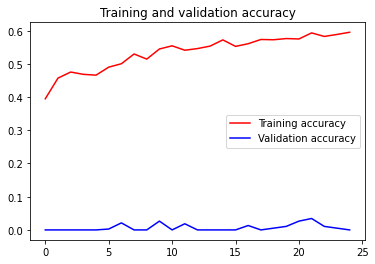

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

### Upload and classify your own image

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Using TensorFlow backend.


Saving train-healthy-0.jpg to train-healthy-0.jpg
Saving train-healthy-1.jpg to train-healthy-1.jpg
Saving train-healthy-2.jpg to train-healthy-2.jpg
Saving train-healthy-3.jpg to train-healthy-3.jpg
Saving train-healthy-4.jpg to train-healthy-4.jpg
train-healthy-0.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-1.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-2.jpg
[[0.00000000e+00 0.00000000e+00 1.16824105e-36 1.00000000e+00
  0.00000000e+00]]
train-healthy-3.jpg
[[0. 1. 0. 0. 0.]]
train-healthy-4.jpg
[[1.7439826e-15 1.0000000e+00 1.1588263e-37 1.0333644e-26 1.3620047e-27]]


## Cassava-Disease-Classification-v2 4xv1 13.8M parameters 58% training accuracy

### Our validation/test data have no labels so we can't really use them to see how our model is performing on this dataset

In [ ]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 5656 images belonging to 5 classes.


### New: 2xv1. Let's define our deep learning model

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

### Model architecture with tensor shapes as they flow through our network

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 256)      

### Let's define our loss function, optimizer and metrics to track

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Model training using GPU

In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, verbose = 1)

Epoch 1/25
20/20 [==============================] - 29s 1s/step - loss: 4.4424 - accuracy: 0.4010
Epoch 2/25
20/20 [==============================] - 29s 1s/step - loss: 1.3896 - accuracy: 0.4349
Epoch 3/25
20/20 [==============================] - 28s 1s/step - loss: 1.4466 - accuracy: 0.4413
Epoch 4/25
20/20 [==============================] - 29s 1s/step - loss: 1.3870 - accuracy: 0.4476
Epoch 5/25
20/20 [==============================] - 28s 1s/step - loss: 1.3811 - accuracy: 0.4623
Epoch 6/25
20/20 [==============================] - 29s 1s/step - loss: 1.3781 - accuracy: 0.4806
Epoch 7/25
20/20 [==============================] - 29s 1s/step - loss: 1.3219 - accuracy: 0.4933
Epoch 8/25
20/20 [==============================] - 28s 1s/step - loss: 1.3905 - accuracy: 0.4738
Epoch 9/25
20/20 [==============================] - 28s 1s/step - loss: 1.3113 - accuracy: 0.4940
Epoch 10/25
20/20 [==============================] - 29s 1s/step - loss: 1.2849 - accuracy: 0.5226
Epoch 11/25
20/20 [

### Save this model and it's weights and biases

In [ ]:
model.save("Cassava-Disease-Classification-v2.h5")

### Plot training accuracy and loss

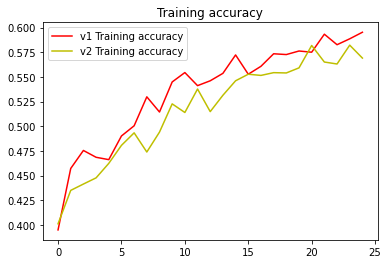

<Figure size 432x288 with 0 Axes>

In [ ]:
acc2 = history.history['accuracy']
loss2 = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='v1 Training accuracy')
plt.plot(epochs, acc2, 'y', label='v2 Training accuracy')

plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

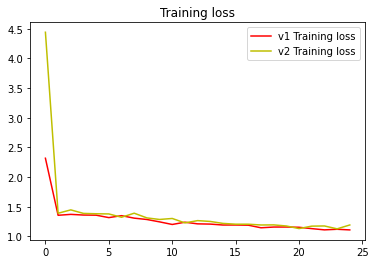

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='v1 Training loss')
plt.plot(epochs, loss2, 'y', label='v2 Training loss')

plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Upload and classify your own image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving train-healthy-0.jpg to train-healthy-0 (1).jpg
Saving train-healthy-1.jpg to train-healthy-1 (1).jpg
Saving train-healthy-2.jpg to train-healthy-2 (1).jpg
Saving train-healthy-3.jpg to train-healthy-3 (1).jpg
Saving train-healthy-4.jpg to train-healthy-4 (1).jpg
train-healthy-0.jpg
[[0.000000e+00 1.071402e-32 9.999993e-01 7.658993e-07 0.000000e+00]]
train-healthy-1.jpg
[[0.0000000e+00 1.0000000e+00 1.4893795e-18 5.7696870e-13 0.0000000e+00]]
train-healthy-2.jpg
[[0.0000000e+00 2.3652431e-09 9.9742436e-01 2.5756066e-03 5.3044334e-18]]
train-healthy-3.jpg
[[0. 1. 0. 0. 0.]]
train-healthy-4.jpg
[[5.0860248e-35 1.0000000e+00 0.0000000e+00 1.2816126e-38 0.0000000e+00]]


## Cassava-Disease-Classification-v3 1xv1 3.4M parameters 72% training accuracy

### Our validation/test data have no labels so we can't really use them to see how our model is performing on this dataset

In [ ]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 5656 images belonging to 5 classes.


### Let's define our deep learning model

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

### Model architecture with tensor shapes as they flow through our network

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

### New: Adam optimizer. Let's define our loss function, optimizer and metrics to track

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### New: 100 epochs vs 25. Model training using GPU

In [ ]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=20, verbose = 1)

Epoch 1/100
20/20 [==============================] - 28s 1s/step - loss: 1.3955 - accuracy: 0.4353
Epoch 2/100
20/20 [==============================] - 28s 1s/step - loss: 1.3259 - accuracy: 0.4762
Epoch 3/100
20/20 [==============================] - 28s 1s/step - loss: 1.3132 - accuracy: 0.4804
Epoch 4/100
20/20 [==============================] - 27s 1s/step - loss: 1.2716 - accuracy: 0.5111
Epoch 5/100
20/20 [==============================] - 27s 1s/step - loss: 1.2102 - accuracy: 0.5563
Epoch 6/100
20/20 [==============================] - 27s 1s/step - loss: 1.1634 - accuracy: 0.5845
Epoch 7/100
20/20 [==============================] - 27s 1s/step - loss: 1.1211 - accuracy: 0.5909
Epoch 8/100
20/20 [==============================] - 27s 1s/step - loss: 1.1559 - accuracy: 0.5734
Epoch 9/100
20/20 [==============================] - 27s 1s/step - loss: 1.1249 - accuracy: 0.5944
Epoch 10/100
20/20 [==============================] - 27s 1s/step - loss: 1.0967 - accuracy: 0.6024
Epoch 11/

### Save this model and it's weights and biases

In [ ]:
model.save("Cassava-Disease-Classification-v3.h5")

### Plot training accuracy and loss

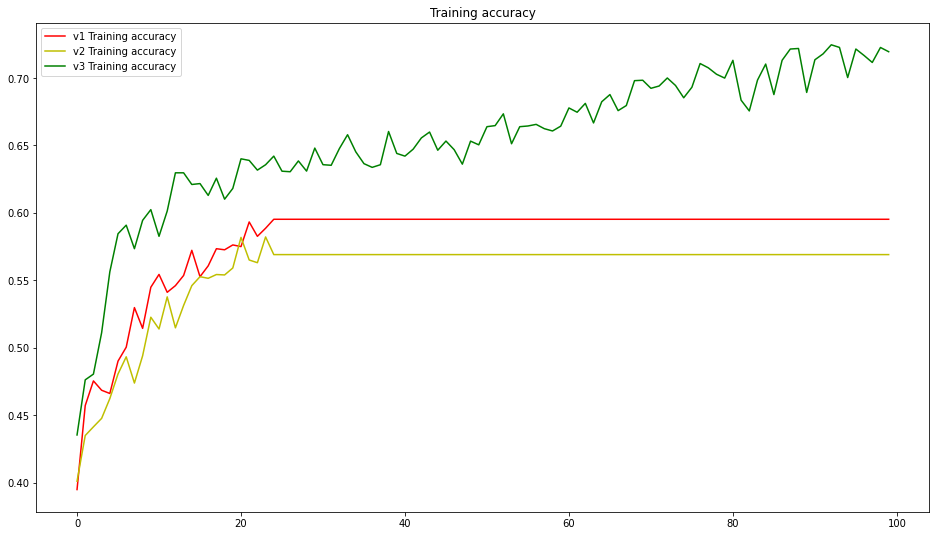

In [ ]:
acc3 = history.history['accuracy']
loss3 = history.history['loss']

epochs = range(len(acc3))

plt.figure(figsize=(16, 9))
plt.plot(epochs, acc + [acc[-1]]*(len(acc3) - len(acc)), 'r', label='v1 Training accuracy') #fill shorter list with last value
plt.plot(epochs, acc2 + [acc2[-1]]*(len(acc3) - len(acc2)), 'y', label='v2 Training accuracy') #fill shorter list with last value
plt.plot(epochs, acc3, 'g', label='v3 Training accuracy')

plt.title('Training accuracy')
plt.legend(loc=0)

plt.show()

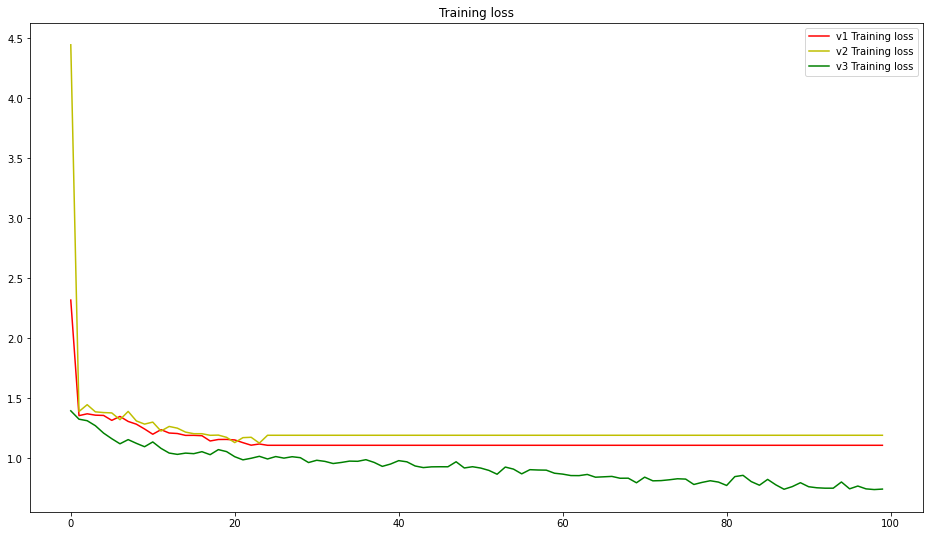

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(epochs, loss + [loss[-1]]*(len(loss3) - len(loss)), 'r', label='v1 Training loss')
plt.plot(epochs, loss2 + [loss2[-1]]*(len(loss3) - len(loss2)), 'y', label='v2 Training loss')
plt.plot(epochs, loss3, 'g', label='v3 Training loss')

plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Upload and classify your own image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving train-healthy-0.jpg to train-healthy-0 (2).jpg
Saving train-healthy-1.jpg to train-healthy-1 (2).jpg
Saving train-healthy-2.jpg to train-healthy-2 (2).jpg
Saving train-healthy-3.jpg to train-healthy-3 (2).jpg
Saving train-healthy-4.jpg to train-healthy-4 (2).jpg
train-healthy-0.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-1.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-2.jpg
[[0. 0. 1. 0. 0.]]
train-healthy-3.jpg
[[0.         0.99396485 0.00603518 0.         0.        ]]
train-healthy-4.jpg
[[0.000000e+00 1.000000e+00 0.000000e+00 5.750063e-29 0.000000e+00]]


## Cassava-Disease-Classification-v4 Transfer Learning MobileNetV2 34M parameters 47% training accuracy

### Our validation/test data have no labels so we can't really use them to see how our model is performing on this dataset

In [11]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=126
)


Found 5656 images belonging to 5 classes.


### Let's define our deep learning model

### New: MobileNetV2 2.2M parameters

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2

In [16]:
pre_trained_model_imagenet_MobileNetV2 = \
  tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), alpha=1.0, include_top=False, weights='imagenet')

for layer in pre_trained_model_imagenet_MobileNetV2.layers:
  layer.trainable = False

In [17]:
pre_trained_model_imagenet_MobileNetV2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

### Let's add our own custom neural network on top of MobileNetV2 and train only that small network

### MobileNetV2 preproprocessing input

In [ ]:
input_layer = tf.keras.layers.Input([224, 224, 3], dtype = tf.uint8)
x = tf.cast(input_layer, tf.float32)
x = tf.keras.applications.mobilenet.preprocess_input(x)

core = pre_trained_model_imagenet_MobileNetV2(x)

In [ ]:
type(core)

tensorflow.python.framework.ops.Tensor

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(core)
# Add a fully connected layer with 512
# hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)

In [ ]:
#model = Model(pre_trained_model_imagenet_MobileNetV2.input, x)
model = Model(inputs = [input_layer], outputs = x)

### Model architecture with tensor shapes as they flow through our network

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Cast_3 (TensorFl [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv_3 (Tenso [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_3 (TensorFlo [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               3211

### New: Adam optimizer. Let's define our loss function, optimizer and metrics to track

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 25 epochs. Model training using GPU

In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, verbose = 1)

Epoch 1/25
20/20 [==============================] - 43s 2s/step - loss: 13.7932 - accuracy: 0.3325
Epoch 2/25
20/20 [==============================] - 43s 2s/step - loss: 1.5689 - accuracy: 0.3703
Epoch 3/25
20/20 [==============================] - 43s 2s/step - loss: 1.4658 - accuracy: 0.3849
Epoch 4/25
20/20 [==============================] - 43s 2s/step - loss: 1.4915 - accuracy: 0.3901
Epoch 5/25
20/20 [==============================] - 43s 2s/step - loss: 1.4884 - accuracy: 0.4214
Epoch 6/25
20/20 [==============================] - 43s 2s/step - loss: 1.4526 - accuracy: 0.4762
Epoch 7/25
20/20 [==============================] - 42s 2s/step - loss: 1.5118 - accuracy: 0.4549
Epoch 8/25
20/20 [==============================] - 43s 2s/step - loss: 1.4601 - accuracy: 0.4591
Epoch 9/25
20/20 [==============================] - 43s 2s/step - loss: 1.4280 - accuracy: 0.4754
Epoch 10/25
20/20 [==============================] - 43s 2s/step - loss: 1.4342 - accuracy: 0.4591
Epoch 11/25
20/20 

### Save this model and it's weights and biases

In [ ]:
model.save("Cassava-Disease-Classification-MobileNetV2-v4.h5")

### Plot training accuracy and loss

In [ ]:
acc4 = history.history['accuracy']
loss4 = history.history['loss']

epochs = range(len(acc3))

plt.figure(figsize=(16, 9))
plt.plot(epochs, acc + [acc[-1]]*(len(acc3) - len(acc)), 'r', label='v1 Training accuracy') #fill shorter list with last value
plt.plot(epochs, acc2 + [acc2[-1]]*(len(acc3) - len(acc2)), 'y', label='v2 Training accuracy') #fill shorter list with last value
plt.plot(epochs, acc3, 'g', label='v3 Training accuracy')
plt.plot(epochs, acc4 + [acc4[-1]]*(len(acc3) - len(acc4)), 'b', label='v4-MobileNetV2 Training accuracy')

plt.title('Training accuracy')
plt.legend(loc=0)

plt.show()

NameError: ignored

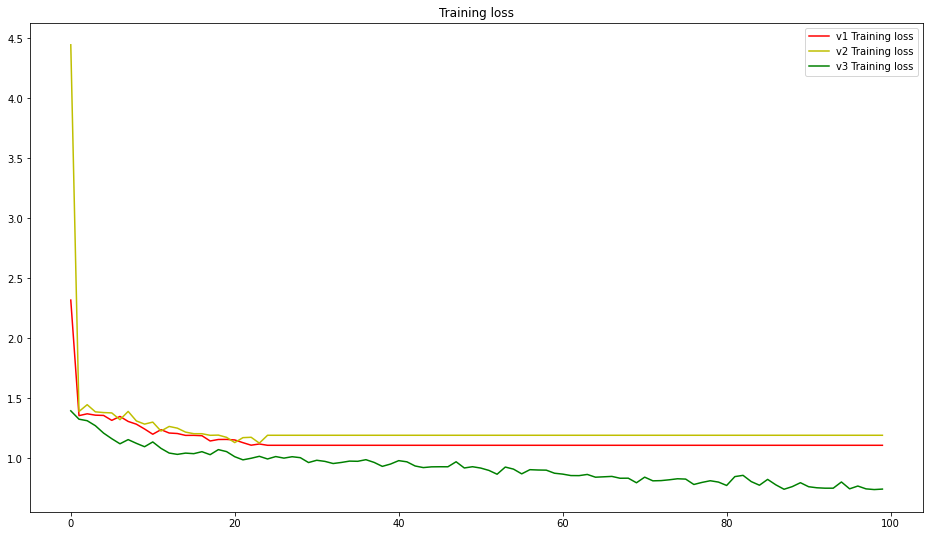

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(epochs, loss + [loss[-1]]*(len(loss3) - len(loss)), 'r', label='v1 Training loss')
plt.plot(epochs, loss2 + [loss2[-1]]*(len(loss3) - len(loss2)), 'y', label='v2 Training loss')
plt.plot(epochs, loss3, 'g', label='v3 Training loss')
plt.plot(epochs, loss4 + [loss4[-1]]*(len(loss3) - len(loss4)), 'b', label='v4-MobileNetV2 Training loss')

plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Upload and classify your own image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

NameError: ignored

## New: Cassava-Disease-Classification-v4.5 Transfer Learning MobileNetV2 max pooling 2.9M parameters 47% training accuracy

### Our validation/test data have no labels so we can't really use them to see how our model is performing on this dataset

In [36]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)


Found 5656 images belonging to 5 classes.


In [37]:
pre_trained_model_imagenet_MobileNetV2 = \
  tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), alpha=1.0, include_top=False, weights='imagenet', pooling='max')

for layer in pre_trained_model_imagenet_MobileNetV2.layers:
  layer.trainable = False

In [38]:
pre_trained_model_imagenet_MobileNetV2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

### Let's add our own custom neural network on top of MobileNetV2 and train only that small network

### MobileNetV2 preproprocessing input

In [39]:
input_layer = tf.keras.layers.Input([224, 224, 3], dtype = tf.uint8)
x = tf.cast(input_layer, tf.float32)
x = tf.keras.applications.mobilenet.preprocess_input(x)

core = pre_trained_model_imagenet_MobileNetV2(x)

In [40]:
type(core)

tensorflow.python.framework.ops.Tensor

In [41]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(core)
# Add a fully connected layer with 512
# hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)

In [42]:
#model = Model(pre_trained_model_imagenet_MobileNetV2.input, x)
model = Model(inputs = [input_layer], outputs = x)

### Model architecture with tensor shapes as they flow through our network

In [43]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Cast_2 (TensorFl [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_RealDiv_2 (Tenso [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_2 (TensorFlo [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 1280)              2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               6558

### New: Adam optimizer. Let's define our loss function, optimizer and metrics to track

In [44]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### New: Let steps_per_epoch be size/batch size by default. Also reduce batch size from 126 ot 32. Use 25 epochs. Model training using GPU

In [45]:
history = model.fit(train_generator, epochs=25, verbose = 1)

Epoch 1/25
177/177 [==============================] - 93s 523ms/step - loss: 1.8528 - accuracy: 0.4264
Epoch 2/25
177/177 [==============================] - 92s 521ms/step - loss: 1.3983 - accuracy: 0.4675
Epoch 3/25
177/177 [==============================] - 91s 514ms/step - loss: 1.3873 - accuracy: 0.4699
Epoch 4/25
177/177 [==============================] - 92s 517ms/step - loss: 1.3836 - accuracy: 0.4694
Epoch 5/25
177/177 [==============================] - 92s 519ms/step - loss: 1.3824 - accuracy: 0.4699
Epoch 6/25
177/177 [==============================] - 91s 514ms/step - loss: 1.3766 - accuracy: 0.4691
Epoch 7/25
177/177 [==============================] - 91s 512ms/step - loss: 1.3680 - accuracy: 0.4699
Epoch 8/25
177/177 [==============================] - 91s 511ms/step - loss: 1.3607 - accuracy: 0.4699
Epoch 9/25
177/177 [==============================] - 90s 507ms/step - loss: 1.3621 - accuracy: 0.4699
Epoch 10/25
177/177 [==============================] - 90s 506ms/step - l

KeyboardInterrupt: ignored

### Save this model and it's weights and biases

In [ ]:
model.save("Cassava-Disease-Classification-MobileNetV2-v4.5.h5")

### Plot training accuracy and loss

In [ ]:
acc4 = history.history['accuracy']
loss4 = history.history['loss']

epochs = range(len(acc3))

plt.figure(figsize=(16, 9))
plt.plot(epochs, acc + [acc[-1]]*(len(acc3) - len(acc)), 'r', label='v1 Training accuracy') #fill shorter list with last value
plt.plot(epochs, acc2 + [acc2[-1]]*(len(acc3) - len(acc2)), 'y', label='v2 Training accuracy') #fill shorter list with last value
plt.plot(epochs, acc3, 'g', label='v3 Training accuracy')
plt.plot(epochs, acc4 + [acc4[-1]]*(len(acc3) - len(acc4)), 'b', label='v4-MobileNetV2 Training accuracy')

plt.title('Training accuracy')
plt.legend(loc=0)

plt.show()

NameError: ignored

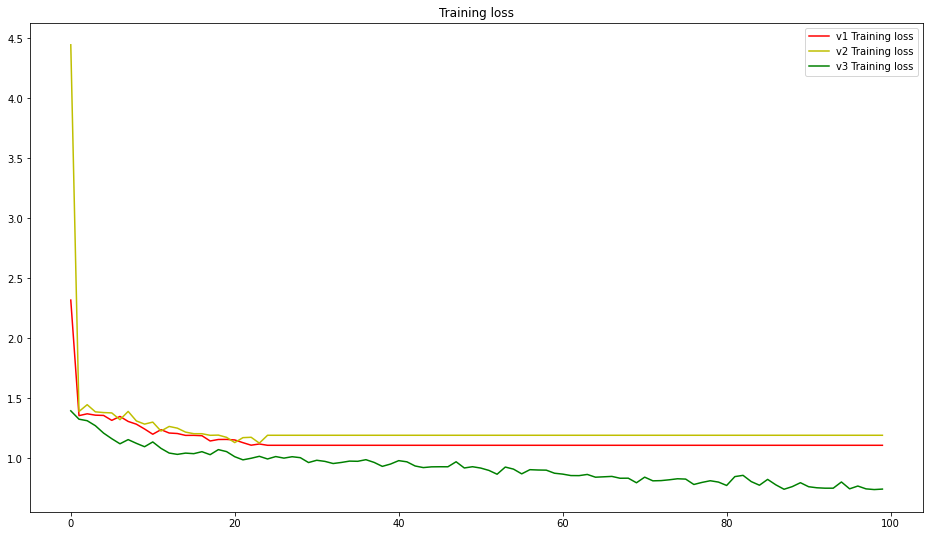

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(epochs, loss + [loss[-1]]*(len(loss3) - len(loss)), 'r', label='v1 Training loss')
plt.plot(epochs, loss2 + [loss2[-1]]*(len(loss3) - len(loss2)), 'y', label='v2 Training loss')
plt.plot(epochs, loss3, 'g', label='v3 Training loss')
plt.plot(epochs, loss4 + [loss4[-1]]*(len(loss3) - len(loss4)), 'b', label='v4-MobileNetV2 Training loss')

plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Upload and classify your own image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

NameError: ignored

## New: Cassava-Disease-Classification-v4.6 Transfer Learning MobileNetV2 max pooling 2.9M parameters 64% training accuracy

### Our validation/test data have no labels so we can't really use them to see how our model is performing on this dataset

In [53]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)


Found 5656 images belonging to 5 classes.


In [54]:
pre_trained_model_imagenet_MobileNetV2 = \
  tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), alpha=1.0, include_top=False, weights='imagenet', pooling='max')

for layer in pre_trained_model_imagenet_MobileNetV2.layers:
  layer.trainable = False

In [55]:
pre_trained_model_imagenet_MobileNetV2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

### Let's add our own custom neural network on top of MobileNetV2 and train only that small network

### New: Remove MobileNetV2 preproprocessing input

In [56]:
#input_layer = tf.keras.layers.Input([224, 224, 3], dtype = tf.uint8)
#x = tf.cast(input_layer, tf.float32)
#x = tf.keras.applications.mobilenet.preprocess_input(x)

#core = pre_trained_model_imagenet_MobileNetV2(x)

last_layer = pre_trained_model_imagenet_MobileNetV2.get_layer('global_max_pooling2d_5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 1280)


In [57]:
type(core)

tensorflow.python.framework.ops.Tensor

In [58]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 512
# hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)

In [59]:
#model = Model(pre_trained_model_imagenet_MobileNetV2.input, x)
model = Model(inputs = pre_trained_model_imagenet_MobileNetV2.input, outputs = x)

### Model architecture with tensor shapes as they flow through our network

In [60]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

### New: Adam optimizer. Let's define our loss function, optimizer and metrics to track

In [61]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### New: Let steps_per_epoch be size/batch size by default. Also reduce batch size from 126 ot 32. Use 25 epochs. Model training using GPU

In [62]:
history = model.fit(train_generator, epochs=25, verbose = 1)

Epoch 1/25
177/177 [==============================] - 92s 520ms/step - loss: 1.8735 - accuracy: 0.4984
Epoch 2/25
177/177 [==============================] - 92s 518ms/step - loss: 1.1377 - accuracy: 0.5476
Epoch 3/25
177/177 [==============================] - 93s 524ms/step - loss: 1.1041 - accuracy: 0.5716
Epoch 4/25
177/177 [==============================] - 93s 523ms/step - loss: 1.0946 - accuracy: 0.5773
Epoch 5/25
177/177 [==============================] - 92s 519ms/step - loss: 1.0301 - accuracy: 0.6068
Epoch 6/25
177/177 [==============================] - 92s 522ms/step - loss: 1.0371 - accuracy: 0.6064
Epoch 7/25
177/177 [==============================] - 92s 518ms/step - loss: 1.0228 - accuracy: 0.6059
Epoch 8/25
177/177 [==============================] - 91s 516ms/step - loss: 1.0171 - accuracy: 0.6045
Epoch 9/25
177/177 [==============================] - 91s 516ms/step - loss: 1.0297 - accuracy: 0.6033
Epoch 10/25
177/177 [==============================] - 90s 511ms/step - l

### Save this model and it's weights and biases

In [63]:
model.save("Cassava-Disease-Classification-MobileNetV2-v4.6.h5")

### Plot training accuracy and loss

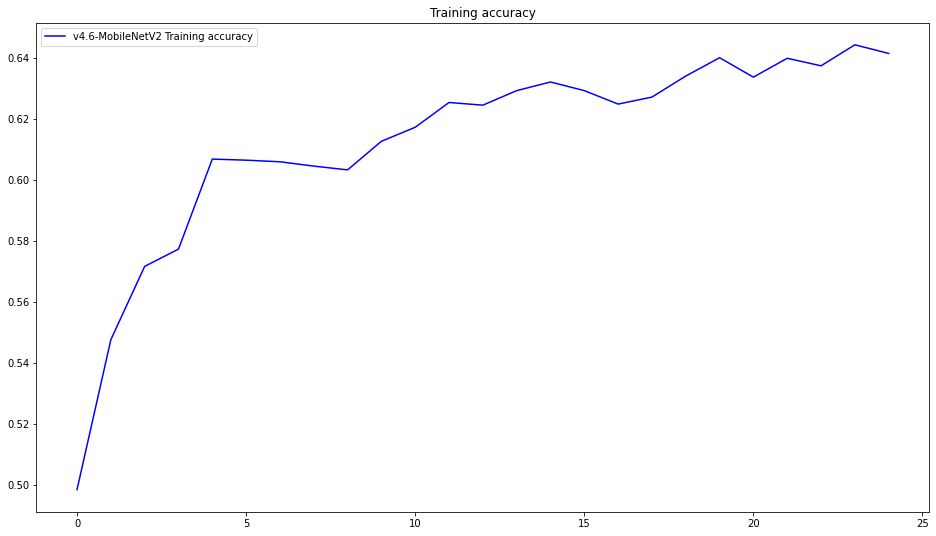

In [64]:
acc46 = history.history['accuracy']
loss46 = history.history['loss']

epochs = range(len(acc46))

plt.figure(figsize=(16, 9))
#plt.plot(epochs, acc + [acc[-1]]*(len(acc3) - len(acc)), 'r', label='v1 Training accuracy') #fill shorter list with last value
#plt.plot(epochs, acc2 + [acc2[-1]]*(len(acc3) - len(acc2)), 'y', label='v2 Training accuracy') #fill shorter list with last value
#plt.plot(epochs, acc3, 'g', label='v3 Training accuracy')
plt.plot(epochs, acc46, 'b', label='v4.6-MobileNetV2 Training accuracy')

plt.title('Training accuracy')
plt.legend(loc=0)

plt.show()

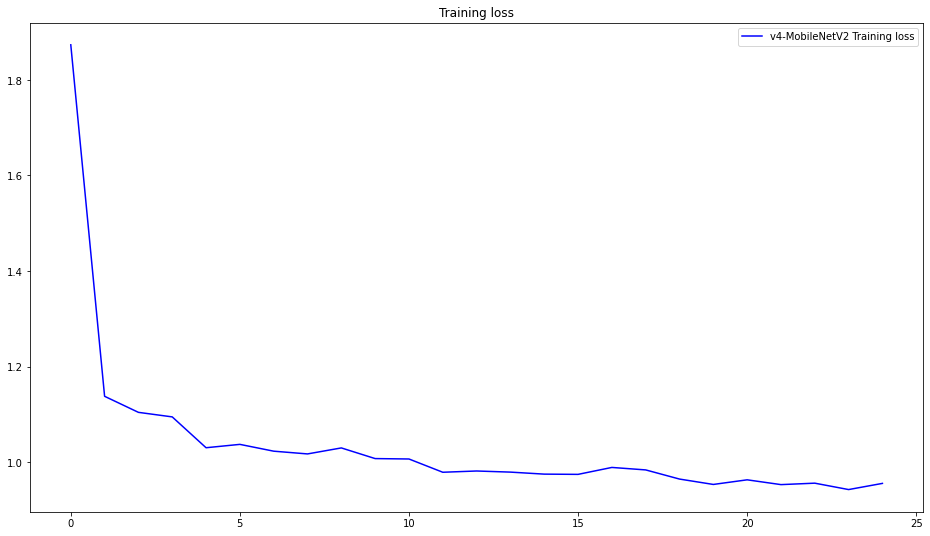

<Figure size 432x288 with 0 Axes>

In [65]:
plt.figure(figsize=(16, 9))
#plt.plot(epochs, loss + [loss[-1]]*(len(loss3) - len(loss)), 'r', label='v1 Training loss')
#plt.plot(epochs, loss2 + [loss2[-1]]*(len(loss3) - len(loss2)), 'y', label='v2 Training loss')
#plt.plot(epochs, loss3, 'g', label='v3 Training loss')
plt.plot(epochs, loss46, 'b', label='v4-MobileNetV2 Training loss')

plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### New: Let steps_per_epoch be size/batch size by default. Also reduce batch size from 126 ot 32. Also use 100 epochs. Model training using GPU

In [ ]:
history = model.fit(train_generator, epochs=100, verbose = 1)

Epoch 1/100
177/177 [==============================] - 94s 532ms/step - loss: 0.9578 - accuracy: 0.6418
Epoch 2/100
177/177 [==============================] - 94s 533ms/step - loss: 0.9477 - accuracy: 0.6473
Epoch 3/100
177/177 [==============================] - 94s 532ms/step - loss: 0.9375 - accuracy: 0.6464
Epoch 4/100
177/177 [==============================] - 94s 530ms/step - loss: 0.9400 - accuracy: 0.6430
Epoch 5/100
177/177 [==============================] - 94s 530ms/step - loss: 0.9364 - accuracy: 0.6506
Epoch 6/100
177/177 [==============================] - 94s 530ms/step - loss: 0.9264 - accuracy: 0.6490
Epoch 7/100
177/177 [==============================] - 94s 530ms/step - loss: 0.9367 - accuracy: 0.6460
Epoch 8/100
177/177 [==============================] - 94s 531ms/step - loss: 0.9464 - accuracy: 0.6421
Epoch 9/100
177/177 [==============================] - 94s 529ms/step - loss: 0.9315 - accuracy: 0.6475
Epoch 10/100
177/177 [==============================] - 93s 524m

### Save this model and it's weights and biases

In [ ]:
model.save("Cassava-Disease-Classification-MobileNetV2-v4.6.100.h5")

### Plot training accuracy and loss

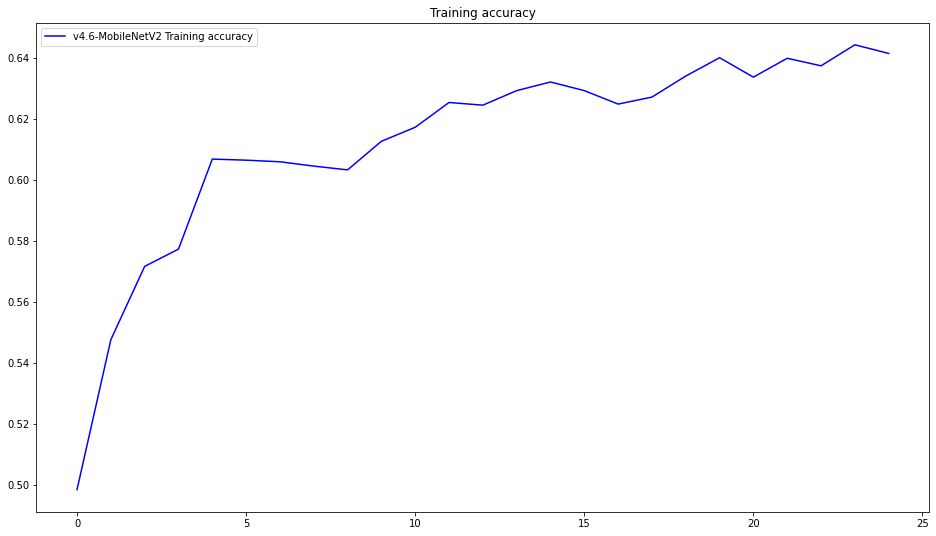

In [ ]:
acc46 = history.history['accuracy']
loss46 = history.history['loss']

epochs = range(len(acc46))

plt.figure(figsize=(16, 9))
#plt.plot(epochs, acc + [acc[-1]]*(len(acc3) - len(acc)), 'r', label='v1 Training accuracy') #fill shorter list with last value
#plt.plot(epochs, acc2 + [acc2[-1]]*(len(acc3) - len(acc2)), 'y', label='v2 Training accuracy') #fill shorter list with last value
#plt.plot(epochs, acc3, 'g', label='v3 Training accuracy')
plt.plot(epochs, acc46, 'b', label='v4.6-MobileNetV2 Training accuracy')

plt.title('Training accuracy')
plt.legend(loc=0)

plt.show()

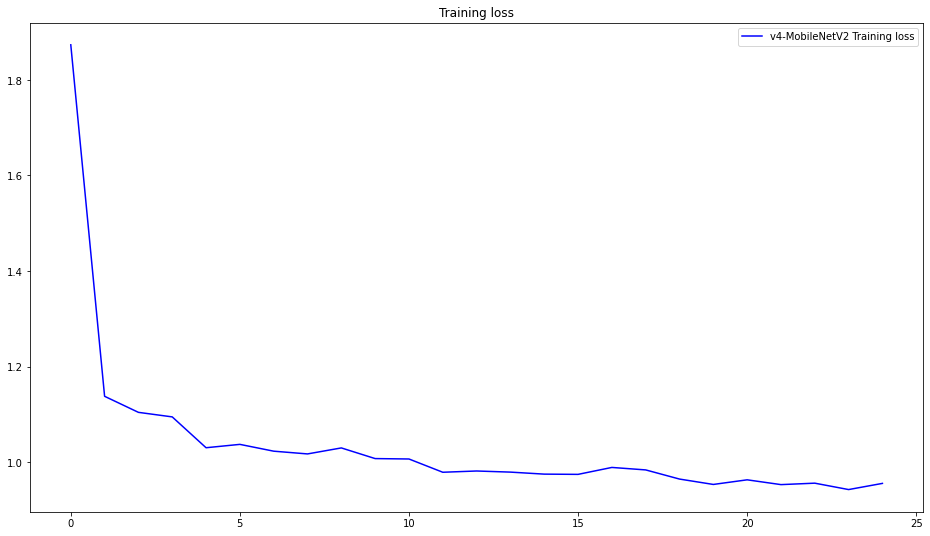

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(16, 9))
#plt.plot(epochs, loss + [loss[-1]]*(len(loss3) - len(loss)), 'r', label='v1 Training loss')
#plt.plot(epochs, loss2 + [loss2[-1]]*(len(loss3) - len(loss2)), 'y', label='v2 Training loss')
#plt.plot(epochs, loss3, 'g', label='v3 Training loss')
plt.plot(epochs, loss46, 'b', label='v4-MobileNetV2 Training loss')

plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Upload and classify your own image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

NameError: ignored

## Cassava-Disease-Classification-v5 Transfer Learning EfficientNetB7 64M parameters 47% training accuracy

### Our validation/test data have no labels so we can't really use them to see how our model is performing on this dataset

In [ ]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=126
)


Found 5656 images belonging to 5 classes.


### Let's define our deep learning model

### New: EfficientNetB7 64M parameters

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

### Note: EfficientNetB7/This API is new and only available in tf-nightly


In [ ]:
#!pip install tf-nightly

     |████████████████████████████████| 324.7MB 53kB/s 
     |████████████████████████████████| 460kB 39.6MB/s 
     |████████████████████████████████| 6.8MB 39.1MB/s 


In [ ]:
pre_trained_model_imagenet_EfficientNetB7 = \
  tf.keras.applications.EfficientNetB7(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

for layer in pre_trained_model_imagenet_EfficientNetB7.layers:
  layer.trainable = False

258080768/258076736 [==============================] - 8s 0us/step


In [ ]:
pre_trained_model_imagenet_EfficientNetB7.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

### Let's add our own custom neural network on top of EfficientNetB7 and train only that small network

### MobileNetV2 preproprocessing input

In [ ]:
input_layer = tf.keras.layers.Input([224, 224, 3], dtype = tf.uint8)
x = tf.cast(input_layer, tf.float32)
#x = tf.keras.applications.mobilenet.preprocess_input(x)

core = pre_trained_model_imagenet_EfficientNetB7(x)

In [ ]:
type(core)

tensorflow.python.framework.ops.Tensor

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(core)
# Add a fully connected layer with 512
# hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)

In [ ]:
model = Model(inputs = [input_layer], outputs = x)

### Model architecture with tensor shapes as they flow through our network

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Cast (TensorFlow [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, 7, 7, 2560)        64097687  
_________________________________________________________________
flatten (Flatten)            (None, 125440)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               64225792  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                

### New: Adam optimizer. Let's define our loss function, optimizer and metrics to track

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 25 epochs. Model training using GPU

In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, verbose = 1)

Epoch 1/25
20/20 [==============================] - 76s 4s/step - loss: 91.5996 - accuracy: 0.2876
Epoch 2/25
20/20 [==============================] - 52s 3s/step - loss: 3.8110 - accuracy: 0.3312
Epoch 3/25
20/20 [==============================] - 52s 3s/step - loss: 1.6024 - accuracy: 0.4654
Epoch 4/25
20/20 [==============================] - 52s 3s/step - loss: 1.5918 - accuracy: 0.4624
Epoch 5/25
20/20 [==============================] - 52s 3s/step - loss: 1.7138 - accuracy: 0.4646
Epoch 6/25
20/20 [==============================] - 52s 3s/step - loss: 1.5695 - accuracy: 0.4731
Epoch 7/25
20/20 [==============================] - 52s 3s/step - loss: 1.5590 - accuracy: 0.4674
Epoch 8/25
20/20 [==============================] - 52s 3s/step - loss: 1.5487 - accuracy: 0.4688
Epoch 9/25
20/20 [==============================] - 52s 3s/step - loss: 1.5416 - accuracy: 0.4517
Epoch 10/25
20/20 [==============================] - 51s 3s/step - loss: 1.5308 - accuracy: 0.4674
Epoch 11/25
20/20 

### Save this model and it's weights and biases

In [ ]:
model.save("Cassava-Disease-Classification-EfficientNetB7-v5.h5")

### Plot training accuracy and loss

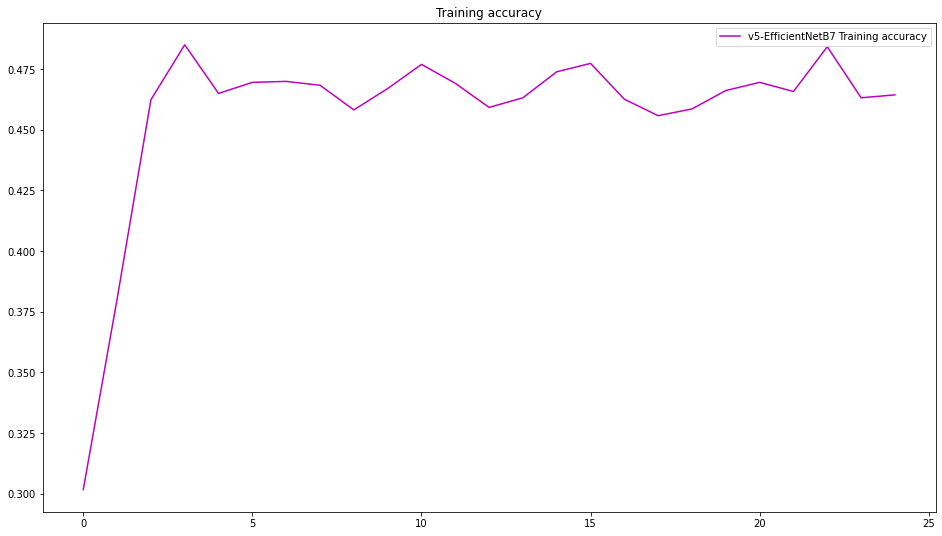

In [ ]:
acc5 = history.history['accuracy']
loss5 = history.history['loss']

epochs = range(len(acc5))

plt.figure(figsize=(16, 9))
#plt.plot(epochs, acc + [acc[-1]]*(len(acc3) - len(acc)), 'r', label='v1 Training accuracy') #fill shorter list with last value
#plt.plot(epochs, acc2 + [acc2[-1]]*(len(acc3) - len(acc2)), 'y', label='v2 Training accuracy') #fill shorter list with last value
#plt.plot(epochs, acc3, 'g', label='v3 Training accuracy')
#plt.plot(epochs, acc4 + [acc4[-1]]*(len(acc3) - len(acc4)), 'b', label='v4-MobileNetV2 Training accuracy')
plt.plot(epochs, acc5, 'm', label='v5-EfficientNetB7 Training accuracy')

plt.title('Training accuracy')
plt.legend(loc=0)

plt.show()

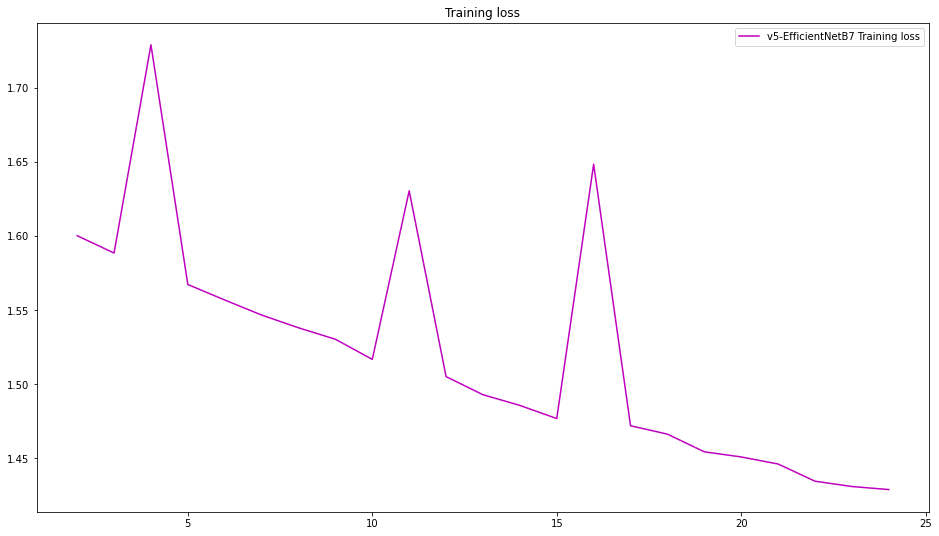

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(16, 9))
#plt.plot(epochs, loss + [loss[-1]]*(len(loss3) - len(loss)), 'r', label='v1 Training loss')
#plt.plot(epochs, loss2 + [loss2[-1]]*(len(loss3) - len(loss2)), 'y', label='v2 Training loss')
#plt.plot(epochs, loss3, 'g', label='v3 Training loss')
#plt.plot(epochs, loss4 + [loss4[-1]]*(len(loss3) - len(loss4)), 'b', label='v4-MobileNetV2 Training loss')
plt.plot(epochs[2:], loss5[2:], 'm', label='v5-EfficientNetB7 Training loss')

plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Upload and classify your own image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

NameError: ignored

### To Do:
reduce RL on pleatau  
keep only best model checkpoint  
300x300  
MobileNet or other models - Done  
pip install tf-explain  

In [ ]:
pip install tf-explain

     |████████████████████████████████| 51kB 2.5MB/s 
